# BUSA8001 - Programming Task 3  

**Assignment Points**: 100  
**Assignment Weight**: 10%  
**Submission**: Submit your file using the URL on iLearn


- Do NOT use `print()` unless explicitly asked to do so
    - Marks will be deducted for not following instructions

---

**Problem 1**  - Total Marks: 7.5

**Q1**. Read the credit card dataset from Programming Task 1 into a DataFrame named `df` and  
- Rename the columns 'PAY_0' and 'default payment next month' as in Programming Task 2 
- Delete 'ID' column    
- Print columns of `df`  
- Print shape of `df`    
(2.5 marks) 




In [118]:
# ---- provide answer here -----
import pandas as pd  # import pandas library 
column_names = ['ID','LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default payment next month']

df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls', skiprows=1, names=column_names)

df = df.drop(['ID'], axis=1) # delete ID column

df = df.rename(columns={"PAY_0":"PAY_1", "default payment next month":"payment_default"})

print(sorted(df)) # print all columns of df

print(df.shape) # prints the shape of df

['AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'EDUCATION', 'LIMIT_BAL', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX', 'payment_default']
(30000, 24)


**Q2**. Feature Engineering - Create additional features and add them to `df` by squaring the following variables  
- LIMIT_BAL  
- All BILL_AMT variables  
- All PAY_AMT variables  

Name the new variables by appending `_2` to the existing variables that you transformed, e.g. LIMIT_BAL_2    
(5 marks)  

In [119]:
# ---- provide answer here -----
import numpy as np

# LIMIT_BAL squared
df['LIMIT_BAL_2'] = np.power((df['LIMIT_BAL']),2)

# All BILL_AMT variables squared
df['BILL_AMT1_2'] = np.power((df['BILL_AMT1']),2)
df['BILL_AMT2_2'] = np.power((df['BILL_AMT2']),2)
df['BILL_AMT3_2'] = np.power((df['BILL_AMT3']),2)
df['BILL_AMT4_2'] = np.power((df['BILL_AMT4']),2)
df['BILL_AMT5_2'] = np.power((df['BILL_AMT5']),2)
df['BILL_AMT6_2'] = np.power((df['BILL_AMT6']),2)

# All PAY_AMT variables squared
df['PAY_AMT1_2'] = np.power((df['PAY_AMT1']),2)
df['PAY_AMT2_2'] = np.power((df['PAY_AMT2']),2)
df['PAY_AMT3_2'] = np.power((df['PAY_AMT3']),2)
df['PAY_AMT4_2'] = np.power((df['PAY_AMT4']),2)
df['PAY_AMT5_2'] = np.power((df['PAY_AMT5']),2)
df['PAY_AMT6_2'] = np.power((df['PAY_AMT6']),2)


<hr style="width:35%;margin-left:0;"> 

**Problem 2.** Cleaning data and dealing with categorical features - Total Marks: 22.5


**Q1**. 

- Print `value_counts()` of 'SEX' column and add dummy variables 'SEX_MALE' and 'SEX_FEMALE' to `df` using `get_dummies()`. Make sure that the original `SEX` variable is removed from `df`. (2.5 marks)

- *Carefully* explain how the new variables are constructed. (1.5 marks)


In [120]:
# ---- provide answer here -----
import pandas as pd
# prints count of unique values in the SEX column
print(df['SEX'].value_counts()) 

df = pd.get_dummies(df, columns = ['SEX'])

2    18112
1    11888
Name: SEX, dtype: int64


In [121]:
# renaming the SEX_1 and SEX_2 dummy variables

df = df.rename(columns={"SEX_1":"SEX_MALE", "SEX_2":"SEX_FEMALE"})

**** EXPLANATION OF NEW VARIABLES ****

The new dummy variables, SEX_1 and SEX_2, are created through the use of the get_dummies() function in Pandas. This function identifies the unique, categorical values contained in SEX (i.e. 1 and 2), and creates 2 additional variables accordingly, which are appended to the dataset. For example, if the original value of SEX for row 1 was 1, the corresponding value of SEX_2 for row 1 will be 0, however the value for SEX_1 will be 1. The dummy variables will only have values of 0 or 1, and the get_dummies function will remove the original categorical variable 'SEX'. The .rename function was used to then rename SEX_1 and SEX_2 to SEX_MALE and SEX_FEMALE respectively. 

**Q2**. Print `value_counts()` of 'MARRIAGE' column, provide its definition, and *carefully* comment on what you notice in relation to the definition of this variable. (2.5 marks) 

In [122]:
# ---- provide answer here -----
print(df['MARRIAGE'].value_counts()) 

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64


**** WRITTEN ANSWER ****

The value_counts() function converts the unique values within a column to categorical, then provides a count of how many of each unique value appears in the column. The unique values in the MARRIAGE column show that the number of rows with MARRIAGE values 0 or 3 are significantly lower than those which contain values of 1 and 2. Given the large discrepancy, for the purposes of this exercise, 0 and 3 will be grouped together as one variable (i.e. MARRIAGE_OTHER). 

**Q3**. 

- Use `get_dummies()` on 'MARRIAGE' and add dummy variables 'MARRIAGE_MARRIED', 'MARRIAGE_SINGLE', 'MARRIAGE_OTHER' to `df`. Allocate all values of 'MARRIAGE' across the 3 newly created features appropriately. Make sure that the orignial 'MARRIAGE' variable is removed from `df`. (5 marks)

- Explain how you created the new features and what decisions you had to make. (3.5 marks)   

In [123]:
# ---- provide answer here -----

# Convert value 0 into the value 3, so that there are only 3 unique values in MARRIAGE

df["MARRIAGE"].replace({0: 3}, inplace=True)

print(df['MARRIAGE'].value_counts()) 

# Creation of dummy variables MARRIAGE_MARRIED, MARRIAGE_SINGLE, MARRIAGE_OTHER
df = pd.get_dummies(df, columns = ['MARRIAGE'])

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64


**Q4**. In the column 'EDUCATION', convert values {0, 4, 5, 6} into the value 4. (7.5 marks)  

In [124]:
# ---- provide answer here -----

# Convert values 0, 4, 5, 6, into the value 4 for EDUCATION column

df['EDUCATION'].replace({0: 4, 4:4, 5:4, 6:4}, inplace=True)


<hr style="width:35%;margin-left:0;"> 

**Problem 3** Preparing X and y arrays - Total Marks: 5

**Q1**. Create `y` from 12,500 consecutive observations starting from observation 1,000, i.e. observation 1,000 is the starting point, of 'payment_default' column from df. Similarly, create `X`  using 12,500 corresponding observatations of all the remaining features in `df` (2.5 marks)

In [125]:
# ---- provide answer here -----
import numpy as np

# 12,500 observations of 'payment_default', starting from obs 1,000 (i.e. 999) into 1D numpy array (y)
y = df.loc[999:13498, ['payment_default']].values
y = np.ravel(y)

# First 12,500 observations of all other features into 2D numpy array X
X = df.loc[999:13498, ['LIMIT_BAL',
'EDUCATION',
'AGE',
'PAY_1',
'PAY_2',
'PAY_3',
'PAY_4',
'PAY_5',
'PAY_6',
'BILL_AMT1',
'BILL_AMT2',
'BILL_AMT3',
'BILL_AMT4',
'BILL_AMT5',
'BILL_AMT6',
'PAY_AMT1',
'PAY_AMT2',
'PAY_AMT3',
'PAY_AMT4',
'PAY_AMT5',
'PAY_AMT6',
'LIMIT_BAL_2',
'BILL_AMT1_2',
'BILL_AMT2_2',
'BILL_AMT3_2',
'BILL_AMT4_2',
'BILL_AMT5_2',
'BILL_AMT6_2',
'PAY_AMT1_2',
'PAY_AMT2_2',
'PAY_AMT3_2',
'PAY_AMT4_2',
'PAY_AMT5_2',
'PAY_AMT6_2',
'SEX_MALE',
'SEX_FEMALE',
'MARRIAGE_1',
'MARRIAGE_2',
'MARRIAGE_3']].values


**Q2**. Use an appropriate scikit-learn library we learned in class to create `y_train`, `y_test`, `X_train` and `X_test` by splitting the data into 70% train and 30% test datasets.  
Set random_state to 2 and stratify subsamples so that train and test datasets have roughly equal proportions of the target's class labels. (2.5 marks) 

In [126]:
# ---- provide answer here -----
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 2, stratify = y)

<hr style="width:35%;margin-left:0;"> 

**Problem 4**. Optimize hyperparameters using grid search and SVC - Total Marks: 40


**Q1**. Use `make_pipeline` to create a pipeline called `pipe_svc` consisting of:   
- StandardScaler    
- PCA (set random_state to 1)  
- SVC (set random_state to 1)  
   
(10 marks)   

In [127]:
# ---- provide answer here -----
# y variable is already encoded, so no need for encoding. 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

from sklearn.pipeline import make_pipeline

#pipe_svc = make_pipeline(StandardScaler(),
                       # PCA(random_state=1),
                        #SVC(random_state=1))

pipe_svc = make_pipeline(StandardScaler(), PCA(random_state=1), SVC(random_state=1))
Pipeline(steps=[('sc', StandardScaler(), 'pca', PCA(random_state=1)), ('svc', SVC(random_state=1))])



Pipeline(steps=[('sc', StandardScaler(), 'pca', PCA(random_state=1)),
                ('svc', SVC(random_state=1))])

**Q2**. Use `GridSearchCV` to create `gs` object, fit the model and tune the following hyperparameters     
- SVC $C$ parameter - grid search over the following values [0.1, 1, 10]    
- SVC kernel - grid search over 3 alternatives: linear, sigmoid, and rbf  
- Number of PCA components - grid search over the following 3 values [1, 4, 9]        
- When implementing `GridSearchCV` set the following options (leaving everying else to their default values)    
    - accuracy for scoring   
    - `refit` to True   
    - number of cross-validation folds to 10   
    - `n_jobs=-1`     
     
(20 marks)   

In [78]:
# ---- provide answer here -----
from sklearn.model_selection import GridSearchCV

param_range_SVC = [0.1, 1.0, 10.0]  # range of values for C and gamma
param_range_PCA = [1, 4, 9]

param_grid2 = [{'svc__C': param_range_SVC,   # range of values for all parameters
               'svc__kernel': ['linear']},
              {'svc__C': param_range_SVC, 
               'svc__kernel': ['sigmoid']}, 
               {'svc__C': param_range_SVC,
                'svc__kernel': ['rbf']},
              {'pca__n_components': param_range_PCA}]

gs = GridSearchCV(estimator=pipe_svc,      # initialise gs object
                  param_grid=param_grid2, 
                  scoring='accuracy', 
                  refit=True,              # this will refit the best estimator to the whole dataset automatically
                  cv=10,
                  n_jobs=-1)


gs = gs.fit(X_train, y_train)            # fit gs

print(gs.best_score_)

print(gs.best_params_)


0.8029714285714287
{'svc__C': 1.0, 'svc__kernel': 'rbf'}


**Q3**. Using the best model optimised by grid-search print the following   
- cross-validation `best_score_`  
- accuracy for the training set  
- accuracy for the test set    

(10 marks)     


In [83]:
# ---- provide answer here -----          # fit gs

print(f'Cross-validation best score: {gs.best_score_}')
             

best_classifier = gs.best_estimator_ 
print(f'Test accuracy: {best_classifier.score(X_test, y_test):.3f}')

print(f'Train accuracy: {best_classifier.score(X_train, y_train):.3f}')

Cross-validation best score: 0.8029714285714287
Test accuracy: 0.809
Train accuracy: 0.813


<hr style="width:35%;margin-left:0;"> 

**Problem 5.** Confusion Matrix - Total marks: 25   

**Q1**. Use the best fitted model of `gs` to print the confusion matrix. (5 marks)  

In [84]:
# ---- provide answer here -----
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

import seaborn as sns

pipe_svc.fit(X_train, y_train)

y_pred = pipe_svc.predict(X_test)

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

print(confmat)

[[2801  102]
 [ 614  233]]


**Q2**. Plot the confusion matrix, and on its basis compute the True Positive Rate, False Positive Rate and Precision. (10 marks)   

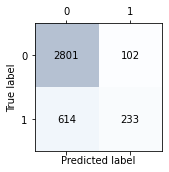

True Positive Rate: 0.9648639338615226
False Positive Rate: 0.7249114521841794
Precision: 0.8202049780380674


In [105]:
# ---- provide answer here -----

from sklearn.metrics import precision_score

from sklearn.metrics import recall_score


# ---------- Plotting 
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
        

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

# TRUE POSITIVE RATE
TPR = 2801/(2801+102)

# FALSE POSITIVE RATE
FPR = 614/(614+233)

# PRECISION
precision = 2801/(2801+614)


**Q3**. Looking at the confusion matrix values and the three quantities that you computed what is the greatest source of risk to the credit card company should it rely on the predictions constructed by our model optimised for `accuracy`?   
Explain your answer in detail. (10 marks)   

*Provide answer here*


***ANSWER***

The greatest source of risk to the Credit Card company, according to the above computed quantities, is the risk of identifying defaults incorrectly, i.e. False Positives. This is otherwise known as a Type 1 statistical error. This model has a very high False Positive rate, of 72.5%. In the above Confusion Matrix, of the 847 individuals that were actually negative, the model incorrectly predicted 614 individuals as actually being positive. This could result in considerable compliance and/or legal implications for the Credit Card company.  

In saying that, however, it is also important to consider the fact that the model is also highly effective at identifying True Positives, with a rate of 96.5%. A Precision score of 82.02% also suggests the model is quite strong at identifying True Positives. So, if the model can be further optimised to improve the False Positive Rate, it can indeed prove to be highly effective for the Credit Card company. 